# Отчёт по работе с изображениями в Teachable Machine

## Задание 1. Хот-доги

Перешла по ссылке [teachablemachine.withgoogle.com]и нажала кнопку «Начать».

Выбрала **«Проект с изображениями»**, затем — **«Стандартная модель изображения»** и переименовала классы в "хот-доги" и "не хот-доги"

Загрузила два класса "Хот-доги" и "Не хот-доги" с папок "hot_dog_train" и "not_hot_dog_train"

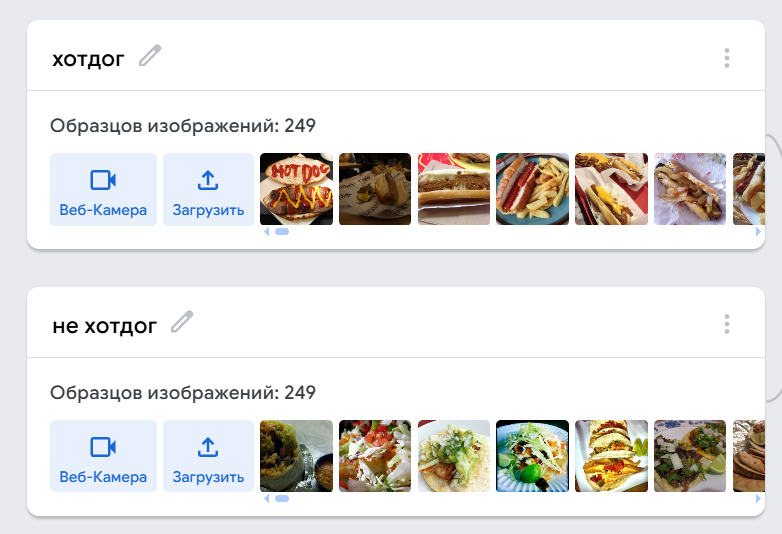

Обучила модель и изучила точность на каждый класс и матрицу ошибок.

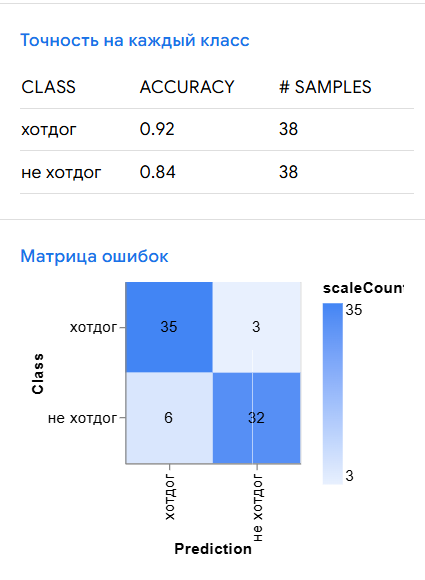

#### Вывод: модель лучше распознает "хот-доги"(92 точность) чем "не хот-доги"(84 точности). 
    
#### Также на 35 "хот-догов", модель приняла неверно всего лишь 6, и на 32 верно определенных "не хот-догов", модель приняла 3 "хот-дога" за "не хот-доги" 

## Проверка обученной модели на правильность определения Хот догов и Не хот догов.

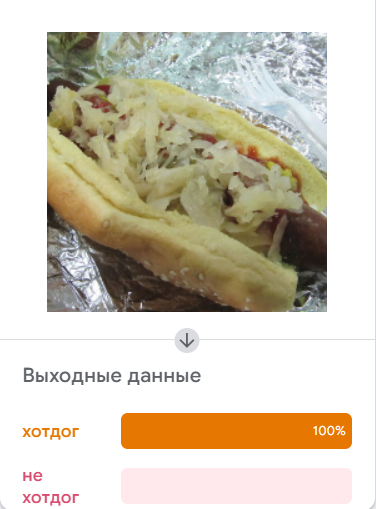

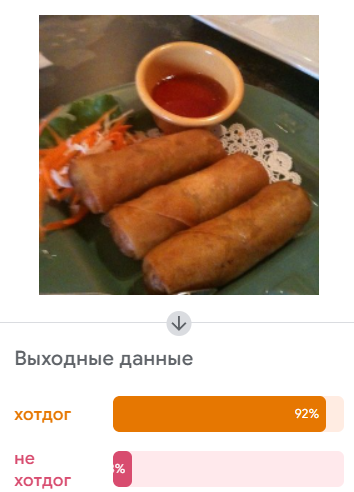

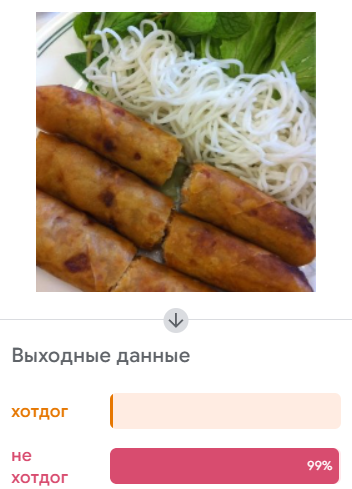

#### Вывод об правильности определения обученной модели:

- Модель уверенно определила хот-дог, что и вправду так

- Модель также уверена, что на фото хот-доги, хотя это обычные рулетики. Скорее всего такие показания из-за формы и цвета.
    
    
- Разрезанные рулетики модель посчитала за "не хот-доги", но 1% сомнений все же есть.

## Проведем также проверку на нестандартные картинки хот-догов.

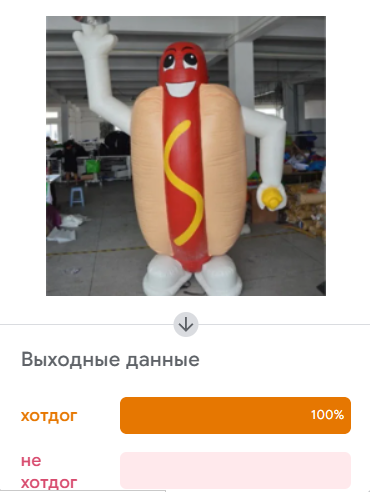

Модель видимо различает хот-доги по форме, цвету и тд...

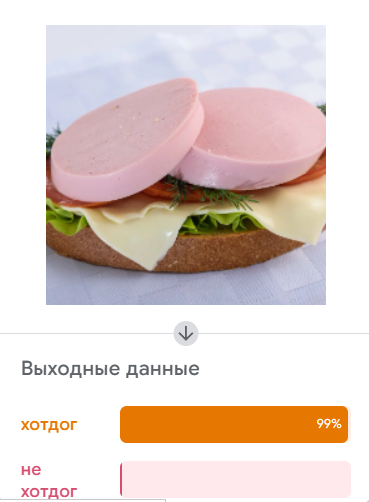

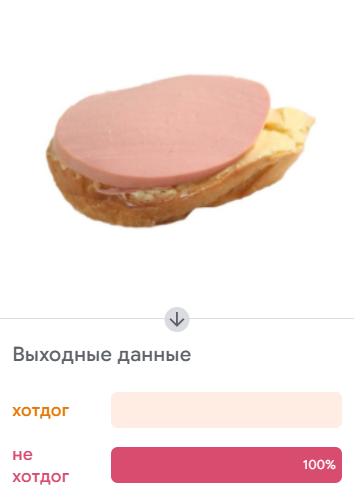

Модель возможно сделала вывод, что если на изображении есть что-то розовое мясное вместе с коричневым хлебом и доп.начинкой, то это хот-дог.

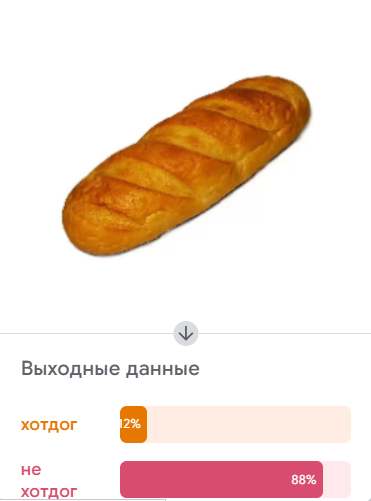


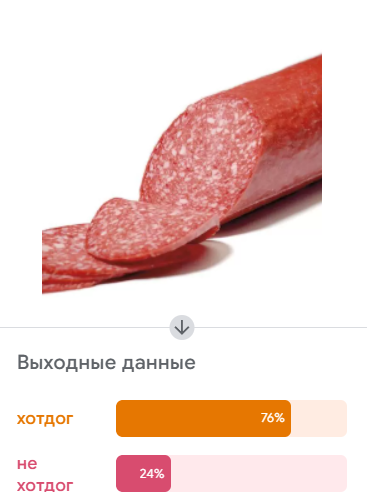

По отдельности копчёная колбаса является больше хот-догом, чем коричневый батон. 

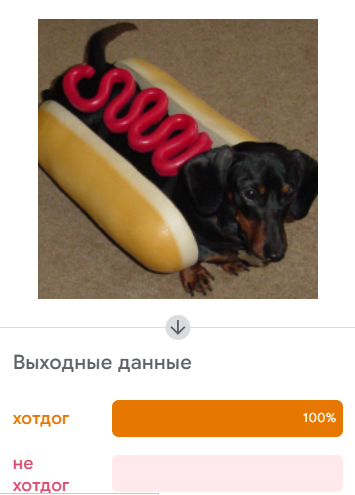

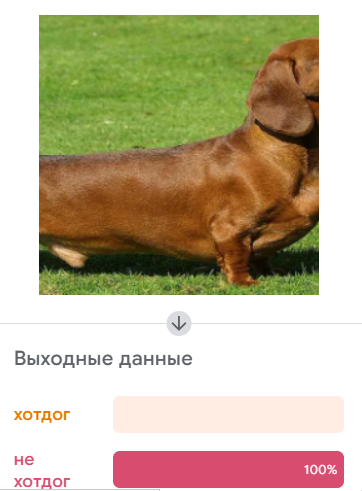

Также были выбраны изображения с "собакой-сосиской" - таксой.
Такса в костюме хот-дога на 100% является хот-догом, в отличии от обычной таксы без костюма.

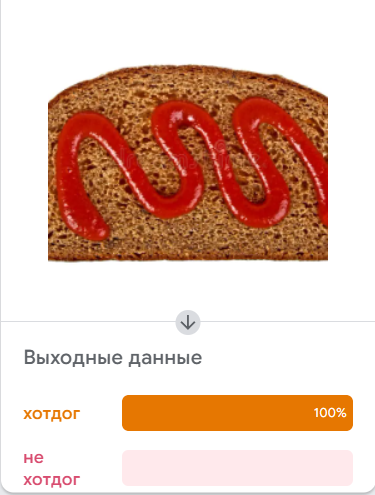

### Вывод: Модель хорошо работает на явных примерах, но путается в нестандартных ситуациях. Также возможно в обучающих изображениях находится большое кол-во хот-догов с соусом (исходя из хлеба с кетчупом)

#

Был изучен фрагмент кода, для использования в уже сохранённой модели и проверки ее на работоспособность.

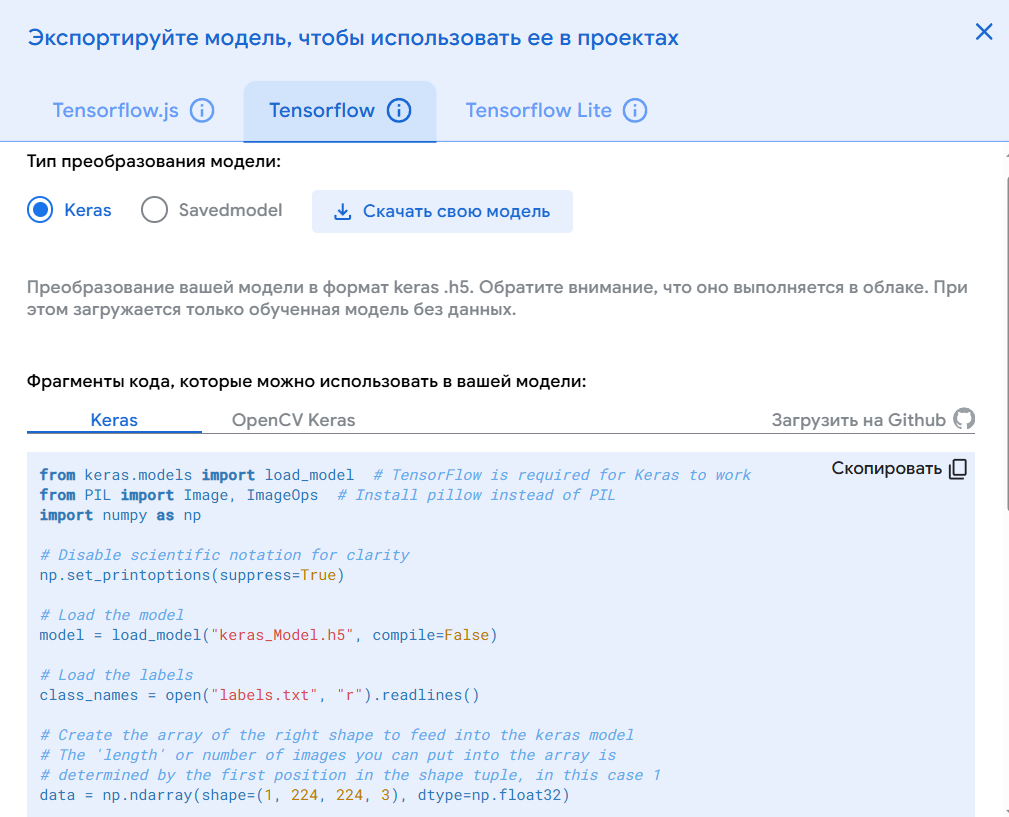

Скачивание и импорт нужных библиотек

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.0


In [2]:
from keras.models import load_model
print("Импорт прошёл успешно!")

Импорт прошёл успешно!


In [3]:
import keras
print(keras.__version__)
print(keras.__file__)

2.12.0
C:\ProgramData\anaconda3\envs\hotdog_env\Lib\site-packages\keras\__init__.py


In [5]:
pip install pillow

  Using cached pillow-12.0.0-cp311-cp311-win_amd64.whl.metadata (9.0 kB)
Using cached pillow-12.0.0-cp311-cp311-win_amd64.whl (7.0 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
wordcloud 1.9.4 requires matplotlib, which is not installed.


In [6]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - ----------------------------------

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
folium 0.20.0 requires xyzservices, which is not installed.
gensim 4.3.3 requires smart-open>=1.8.1, which is not installed.
nipype 1.9.2 requires click>=6.6.0, which is not installed.
nipype 1.9.2 requires filelock>=3.0.0, which is not installed.
nipype 1.9.2 requires networkx>=2.5, which is not installed.
pyldavis 3.4.1 requires joblib>=1.2.0, which is not installed.
pyldavis 3.4.1 requires numexpr, which is not installed.
pyldavis 3.4.1 requires scikit-learn>=1.0.0, which is not installed.
spacy 3.8.6 requires tqdm<5.0.0,>=4.38.0, which is not installed.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.3.4 which is incompatible.
scipy 1.10.1 requires numpy<1.27.0,>=1.19.5, but you have numpy 2.3.4 which is incompatible.
tensorflow-intel 2.12.0 requires numpy<1.

Проверка фрагмента кода на 3 изображениях

In [4]:
import tensorflow as tf
from tensorflow.keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("keras_model.h5", compile=False)

# Load the labels
class_names = open("labels.txt", "r", encoding="utf-8").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open("hot_dog_validation/154409.jpg").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:].strip())
print("Confidence Score:", confidence_score)

1/1 [==============================] - 1s 889ms/step
Class: не хот-доги
Confidence Score: 1.0


In [5]:
import tensorflow as tf
from tensorflow.keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("keras_model.h5", compile=False)

# Load the labels
class_names = open("labels.txt", "r", encoding="utf-8").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open("not_hot_dog_validation/76061.jpg").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:].strip())
print("Confidence Score:", confidence_score)


1/1 [==============================] - 1s 703ms/step
Class: не хот-доги
Confidence Score: 1.0


In [6]:
import tensorflow as tf
from tensorflow.keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("keras_model.h5", compile=False)

# Load the labels
class_names = open("labels.txt", "r", encoding="utf-8").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open("hot_dog_validation/nestandart.jpg").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:].strip())
print("Confidence Score:", confidence_score)


1/1 [==============================] - 1s 715ms/step
Class: хот-доги
Confidence Score: 0.9212984


## Задание 2. Хомяк, крыса, другое

Собрала коллекцию изображений для трёх классов, в каждом классе минимум 100 изображений.

Изображения скачаны с Google Images и приложения Pinterest.


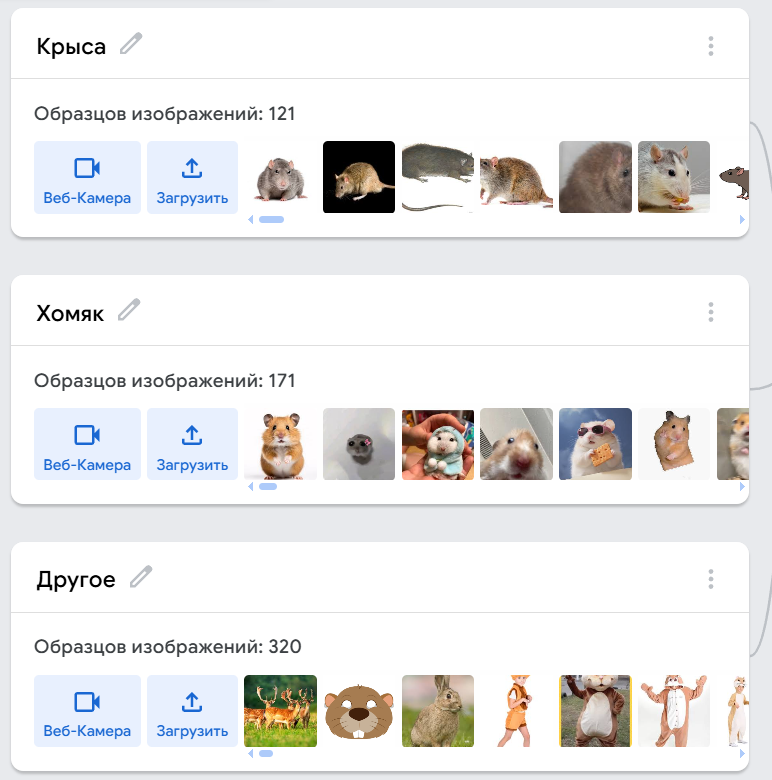

Обучила модель в сервисе Teachable Machine, также выбрала кол-во эпох - 250 (сколько раз обработаются данные, чем выше тем лучше)

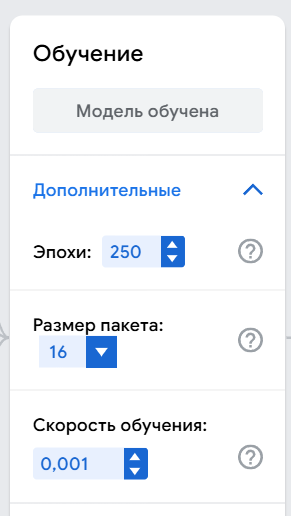

Вычислила точность на каждый класс и матрицу ошибок

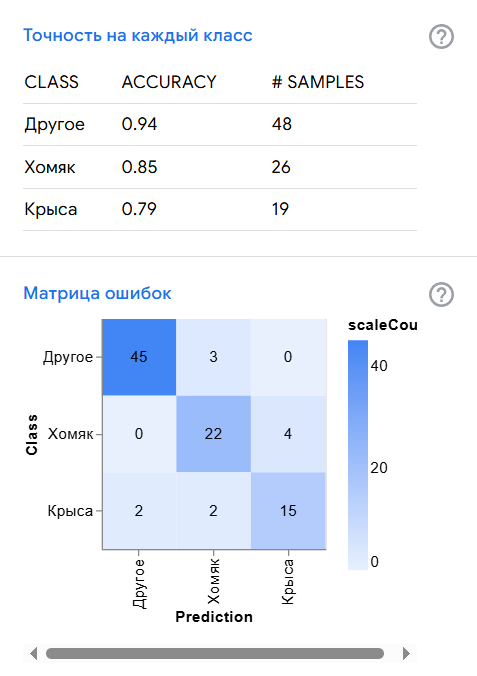

####  Вывод по результатам обучения модели

Модель показала хорошую точность на классе "Другое"(94%), но хуже справилась с определение хомяков и крыс. Однако фотографий крыс мало, и скорее всего из-за этого, крыс он определяет хуже всего.

Сразу проведем проверку на определение животных при неизвестных изображениях

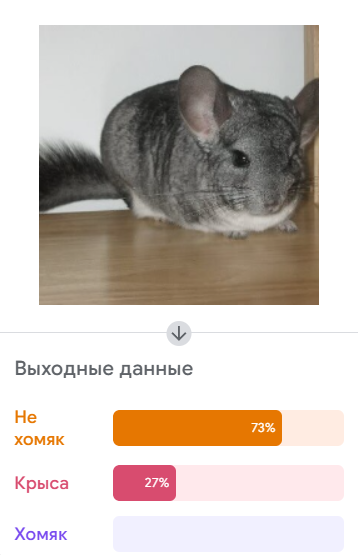

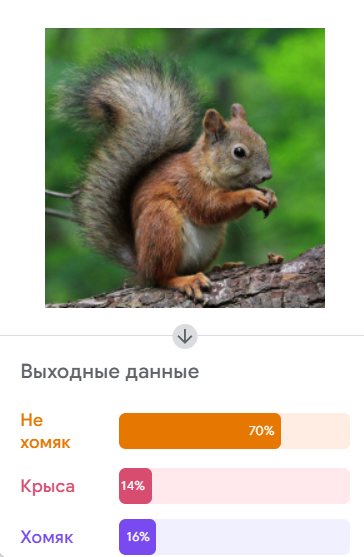

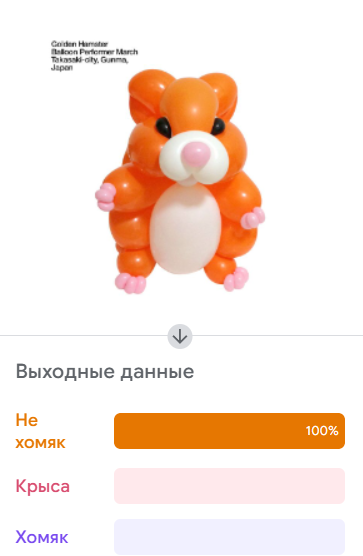

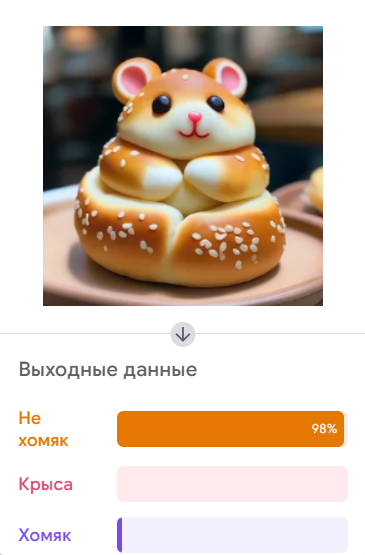

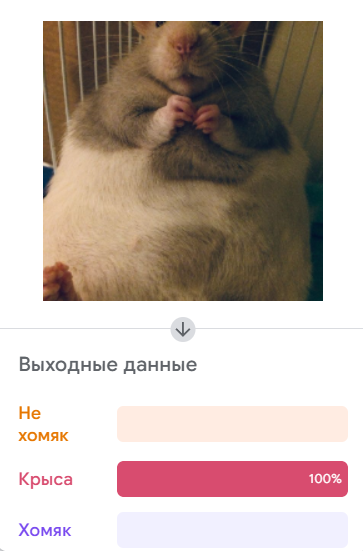

#### Вывод по тестированию модели

Модель в целом работает неплохо, но иногда путается в «сложных» случаях, например при виде шиншиллы и белок. Для улучшения точности проверое можно добавить сложные ситуцации и фотографии других животных.

### Сохранила модель и проверила работу на нескольких изображениях в Jupyter Notebook с помощью фрагмента кода.

In [7]:
import tensorflow as tf
from tensorflow.keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("keras_model1.h5", compile=False)

# Load the labels
class_names = open("labels1.txt", "r", encoding="utf-8").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open("kitty.jpg").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:].strip())
print("Confidence Score:", confidence_score)

1/1 [==============================] - 1s 945ms/step
Class: Другое
Confidence Score: 0.83930796


In [8]:
import tensorflow as tf
from tensorflow.keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("keras_model1.h5", compile=False)

# Load the labels
class_names = open("labels1.txt", "r", encoding="utf-8").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open("mini-pig.jpg").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:].strip())
print("Confidence Score:", confidence_score)

1/1 [==============================] - 1s 712ms/step
Class: Крыса
Confidence Score: 0.62204975


### Задание 3

### Задание 4

Разработала программный интерфейс для модели машинного обучения. API позволяет получить результат и точность распознавания.
Также разработала небольшое приложение с графическим интерфейсом, которое должно позволить загрузить изображение и с помощью разработанного API показать результат распознавания.

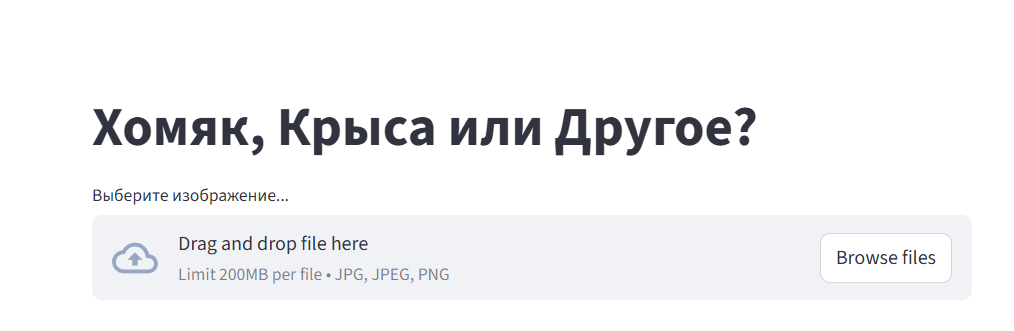

Загружаем фотку

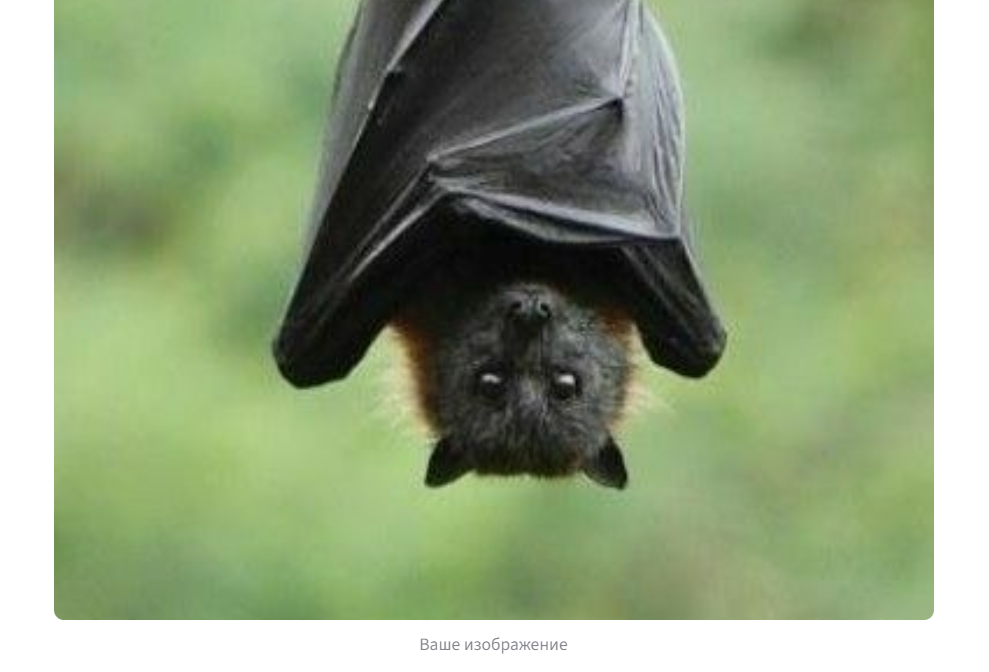

Смотрим результат!

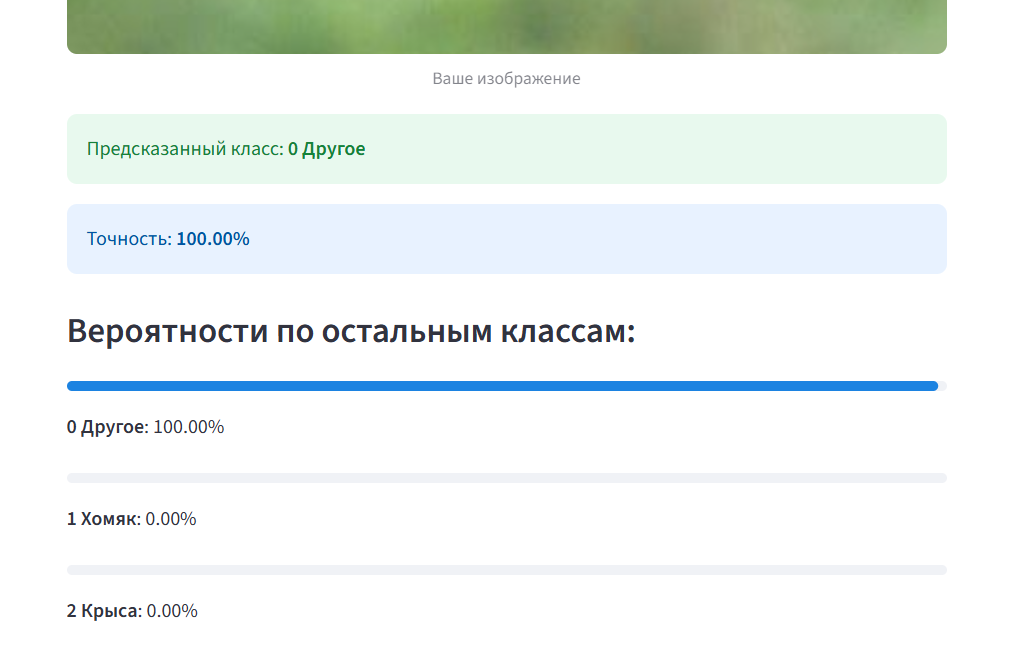

## Вывод:

В ходе проделанной работы, были разработаны:
- Модель, которая предсказывает классы.
- FastAPI, который принимает фото и возвращает результат.
- Streamlit, где пользователь загружает фото и убеждается в том что это хомяк, крыса или другое